# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nesya Nathania Putri
- **Email:** M200B4KX3322@bangkit.academy
- **ID Dicoding:** nesya_nathania_putri

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah ada korelasi antara jumlah foto produk dan rating ulasan?
- Pertanyaan 2: Produk kategori mana yang paling banyak terjual dan menghasilkan pendapatan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr

## Data Wrangling

### Gathering Data

In [ ]:
products_df = pd.read_csv('products_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')
reviews_df = pd.read_csv('order_reviews_dataset.csv')

# Gabungkan order_items dengan products berdasarkan 'product_id'
merged_df = pd.merge(order_items_df[['order_id', 'product_id']],
                     products_df[['product_id', 'product_photos_qty']],
                     on='product_id', how='inner')
# Gabungkan hasil di atas dengan reviews berdasarkan 'order_id'
data1_df = pd.merge(merged_df,
                    reviews_df[['order_id', 'review_score']],
                    on='order_id', how='inner')
print(data1_df.head())

                           order_id                        product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1  130898c0987d1801452a8ed92a670612  4244733e06e7ecb4970a6e2683c13e61   
2  532ed5e14e24ae1f0d735b91524b98b9  4244733e06e7ecb4970a6e2683c13e61   
3  6f8c31653edb8c83e1a739408b5ff750  4244733e06e7ecb4970a6e2683c13e61   
4  7d19f4ef4d04461989632411b7e588b9  4244733e06e7ecb4970a6e2683c13e61   

   product_photos_qty  review_score  
0                 4.0             5  
1                 4.0             5  
2                 4.0             4  
3                 4.0             5  
4                 4.0             5  


In [ ]:
order_items_df = pd.read_csv('order_items_dataset.csv')
products_df = pd.read_csv('products_dataset.csv')

# Menggabungkan order_items_dataset dengan products_dataset berdasarkan 'product_id'
merged_data = pd.merge(order_items_df, products_df, on='product_id', how='inner')

data2_df = merged_data[['order_id', 'product_category_name', 'price']]
# Menampilkan data yang telah digabungkan
print(data2_df.head())

                           order_id product_category_name  price
0  00010242fe8c5a6d1ba2dd792cb16214            cool_stuff   58.9
1  130898c0987d1801452a8ed92a670612            cool_stuff   55.9
2  532ed5e14e24ae1f0d735b91524b98b9            cool_stuff   64.9
3  6f8c31653edb8c83e1a739408b5ff750            cool_stuff   58.9
4  7d19f4ef4d04461989632411b7e588b9            cool_stuff   58.9


**Insight:**
- menyiapkan data untuk menganalisis korelasi antara jumlah foto produk dan rating ulasan. Data yang digunakan yaitu product_dataset (kolom product_id, product_photos_qty), order_items_dataset (kolom product_id, order_id), dan order_reviews_dataset (kolom order_id, review_score). Dari tiga dataset tersebut dibuat menjadi satu dataframe baru yaitu data1_df.
- menyiapkan data untuk menganalisis kategori produk yang paling banyak terjual dan menghasilkan pendapatan tertinggi. Data yang digunakan yaitu order_items_dataset (kolom order_id, price), products_dataset (kolom product_category_name). Dari dua dataset tersebut dibuat menjadi satu dataframe baru yaitu data2_df.

### Assessing Data

In [ ]:
data1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            112372 non-null  object 
 1   product_id          112372 non-null  object 
 2   product_photos_qty  110774 non-null  float64
 3   review_score        112372 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


**Insight:**
- Kolom order_id, product_id, dan review_score memiliki data yang lengkap tanpa missing value.
- Terdapat missing value pada kolom product_photos_qty
- Kolom product_photos_qty bertipe float64 yang memungkinkan angka desimal. Akan diubah menjadi integer karena jumlah foto seharusnya berupa angka bulat.

In [ ]:
data2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               112650 non-null  object 
 1   product_category_name  111047 non-null  object 
 2   price                  112650 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


**Insight:**
- Kolom order_id dan price memiliki data yang lengkap tanpa missing value.
- Terdapat missng value sebanyak 1603 data pada kolom product_category_name.
- Tipe data pada setiap kolom sudah sesuai.

### Cleaning Data

#### Data Pertanyaan 1

In [ ]:
#hitung jumlah missing value di tiap kolom
data1_df.isna().sum()

,0
order_id,0
product_id,0
product_photos_qty,1598
review_score,0


**Insight:**
- terdapat 1598 dari 112372 data yang merupakan missing value pada kolom product_photos_qty. Oleh karena jumlah data yang hilang cukup kecil (1598 dari 112372 = sekitar 1.42%), maka mempertimbangkan untuk menghapus baris-baris tersebut agar mnghindari potensi bias dari data yang diisi secara artifisial.

In [ ]:
# Hapus baris yang merupakan missing value pada kolom product_photos_type
data1_df.dropna(subset=['product_photos_qty'], inplace=True)

In [ ]:
# Ubah tipe data kolom 'product_photos_qty' menjadi int
data1_df['product_photos_qty'] = data1_df['product_photos_qty'].astype(int)

In [ ]:
# Cek data duplikat
print(f"Terdapat {data1_df.duplicated().sum()} baris duplikat pada data")

Terdapat 10371 baris duplikat pada data


In [ ]:
# Hapus data duplikat
data1_df = data1_df.drop_duplicates().reset_index(drop=True)

In [ ]:
# Menghitung Q1, Q3, dan IQR untuk product_photos_qty
Q1_photos = data1_df['product_photos_qty'].quantile(0.25)
Q3_photos = data1_df['product_photos_qty'].quantile(0.75)
IQR_photos = Q3_photos - Q1_photos
lower_photos = Q1_photos - 1.5 * IQR_photos
upper_photos = Q3_photos + 1.5 * IQR_photos

# Menghitung Q1, Q3, dan IQR untuk review_score
Q1_review = data1_df['review_score'].quantile(0.25)
Q3_review = data1_df['review_score'].quantile(0.75)
IQR_review = Q3_review - Q1_review
lower_review = Q1_review - 1.5 * IQR_review
upper_review = Q3_review + 1.5 * IQR_review

# Menampilkan batas bawah dan atas
print(f"Batas bawah dan atas product_photos_qty: {lower_photos}, {upper_photos}")
print(f"Batas bawah dan atas review_score: {lower_review}, {upper_review}")

# Melihat nilai unik pada kolom product_photos_qty
unique_photos_qty = data1_df['product_photos_qty'].unique()
print("Nilai unik pada kolom product_photos_qty:", unique_photos_qty)

# Melihat nilai unik pada kolom review_score
unique_review_score = data1_df['review_score'].unique()
print("Nilai unik pada kolom review_score:", unique_review_score)

# Cek Outlier menggunakan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Mendeteksi outlier pada kolom product_photos_qty
outliers_photos, lower_photos, upper_photos = detect_outliers_iqr(data1_df, 'product_photos_qty')
print(f"Jumlah outlier di product_photos_qty: {len(outliers_photos)}")

# Mendeteksi outlier pada kolom review_score
outliers_review, lower_review, upper_review = detect_outliers_iqr(data1_df, 'review_score')
print(f"Jumlah outlier di review_score: {len(outliers_review)}")

Batas bawah dan atas product_photos_qty: -2.0, 6.0
Batas bawah dan atas review_score: 2.5, 6.5
Nilai unik pada kolom product_photos_qty: [ 4  6  2  1  3  5  7  9  8 11 10 13 15 12 18 20 17 19 14]
Nilai unik pada kolom review_score: [5 4 1 3 2]
Jumlah outlier di product_photos_qty: 2935
Jumlah outlier di review_score: 14952


**Insight:**
- review_score merupakan skor ulasan dari pelanggan bernilai 1 hingga 5. Setiap nilai merepresentasikan tingkat kepuasan pelanggan. Menurut perhitungan IQR, nilai di bawah 2.5 dianggap outlier tetapi skor 1 dan 2 adalah nilai valid dan penting yang merepresentasikan ulasan negatif atau ketidakpuasan pelanggan sehingga tidak dilakukan penghapusan/imputasi pada data outlier review_score.
- product_photos_qty merupakan banyaknya foto produk yang bernilai 1 hingga 20. Jumlah foto produk di atas 6 dianggap sebagai outlier tetapi beberapa produk mungkin memerlukan lebih banyak foto untuk menarik pelanggan. Untuk menganalisis korelasi antara jumlah foto dan rating ulasan, maka tidak dilakukan penghapusan/imputasi pada data outlier karena dapat menghilangkan bagian penting dari analisis.

#### Data Pertanyaan 2

In [ ]:
#hitung jumlah missing value di tiap kolom
data2_df.isna().sum()

,0
order_id,0
product_category_name,1603
price,0


**Insight:**
- terdapat 1603 dari 112650 data yang merupakan missing value pada kolom product_category_name. Oleh karena jumlah data yang hilang cukup kecil (1603 dari 112650 sekitar 1,42%), maka mempertimbangkan untuk menghapus baris-baris tersebut agar mnghindari potensi bias dari data yang diisi secara artifisial.

In [ ]:
# Hapus baris yang merupakan missing value pada kolom product_category_name
data2_df.dropna(subset=['product_category_name'], inplace=True)

<ipython-input-14-7e236729ce72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_df.dropna(subset=['product_category_name'], inplace=True)


In [ ]:
# Cek data duplikat
print(f"Terdapat {data2_df.duplicated().sum()} baris duplikat pada data")

Terdapat 11167 baris duplikat pada data


In [ ]:
# Hapus data duplikat
data2_df = data2_df.drop_duplicates().reset_index(drop=True)

In [ ]:
# Menghitung Q1, Q3, dan IQR untuk price
Q1_price = data2_df['price'].quantile(0.25)
Q3_price = data2_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_price = Q1_price - 1.5 * IQR_price
upper_price = Q3_price + 1.5 * IQR_price

# Menampilkan batas bawah dan atas
print(f"Batas bawah dan atas price: {lower_price}, {upper_price}")

# Cek Outlier menggunakan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Mendeteksi outlier pada kolom price
outliers_price, lower_price, upper_price = detect_outliers_iqr(data2_df, 'price')
print(f"Jumlah outlier di price: {len(outliers_price)}")

# Melihat kategori produk yang merupakan outlier
outliers_price = data2_df[(data2_df['price'] < lower_price) | (data2_df['price'] > upper_price)]
outlier_details = outliers_price[['product_category_name', 'price']]
outlier_summary = outlier_details.groupby('product_category_name').first().reset_index()
print(outlier_summary)

Batas bawah dan atas price: -106.60000000000001, 287.8
Jumlah outlier di price: 7622
        product_category_name    price
0   agro_industria_e_comercio   397.00
1           alimentos_bebidas   699.90
2                       artes   299.99
3          artes_e_artesanato   289.49
4           artigos_de_festas   398.00
..                        ...      ...
57    sinalizacao_e_seguranca   319.90
58   tablets_impressao_imagem   889.99
59                  telefonia   399.90
60             telefonia_fixa  1680.00
61      utilidades_domesticas   379.90

[62 rows x 2 columns]


**Insight:**
- Menurut perhitungan IQR, produk dengan harga di atas 287.8 dianggap sebagai outlier sehingga ditemukan 7622 data outlier harga dari 61 kategori produk.Harga pada kategori tersebut dianggap wajar dan tidak disebabkan oleh kesalahan input data sehingga tidak dilakukan penghapusan atau imputasi terhadap data outlier.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Menghitung korelasi Spearman antara product_photos_qty dan review_score
correlation, p_value = spearmanr(data1_df['product_photos_qty'], data1_df['review_score'])

print(f"Koefisien Korelasi Spearman: {correlation}")
print(f"Nilai p-value: {p_value}")

Koefisien Korelasi Spearman: 0.01676457931908974
Nilai p-value: 1.0818827030361331e-07


In [ ]:
# Menghitung jumlah produk terjual untuk setiap kategori
total_terjual_per_kategori = data2_df.groupby('product_category_name')['order_id'].count().reset_index()
total_terjual_per_kategori.columns = ['product_category_name', 'total_terjual']

# Menghitung total pendapatan untuk setiap kategori
total_pendapatan_per_kategori = data2_df.groupby('product_category_name')['price'].sum().reset_index()
total_pendapatan_per_kategori.columns = ['product_category_name', 'total_pendapatan']

result_df = pd.merge(total_terjual_per_kategori, total_pendapatan_per_kategori, on='product_category_name')
result_df = result_df.sort_values(by='total_pendapatan', ascending=False)
print(result_df.head())

     product_category_name  total_terjual  total_pendapatan
11            beleza_saude           8945        1205858.49
66      relogios_presentes           5749        1183392.58
13         cama_mesa_banho           9838         942506.74
32           esporte_lazer           7822         926440.42
44  informatica_acessorios           6846         801633.16


**Insight:**
- Dilakukan analisis korelasi Spearman karena analisis ini sesuai untuk data ordinal seperti rating ulasan yang berkisar dari 1 hingga 5, serta lebih tahan terhadap outlier dalam data jumlah foto produk. Berdasarkan hasil analisis, diperoleh koefisien sebesar 0,0168 yang mendekati nol sehingga mengindikasikan bahwa jumlah foto produk memiliki pengaruh tidak signifikan pada skor ulasan yang diberikan oleh pelanggan. Lalu nilai p-value 1.08e-07 menunjukkan bahwa terdapat hubungan antara jumlah foto produk meskipun sangat lemah.
-  Produk kategori yang paling banyak terjual dan menghasilkan pendapatan tertinggi yaitu beleza_saude, relogios_presentes, cama_mesa_banho, esporte_lazer, dan informatica_acessorios. Meskipun kategori cama_mesa_banho memiliki jumlah produk terjual yang paling banyak, pendapatan yang dihasilkan relatif lebih rendah dibandingkan dua kategori pertama sehingga menunjukkan bahwa kategori dengan jumlah produk terjual lebih sedikit tidak selalu memiliki pendapatan yang lebih rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

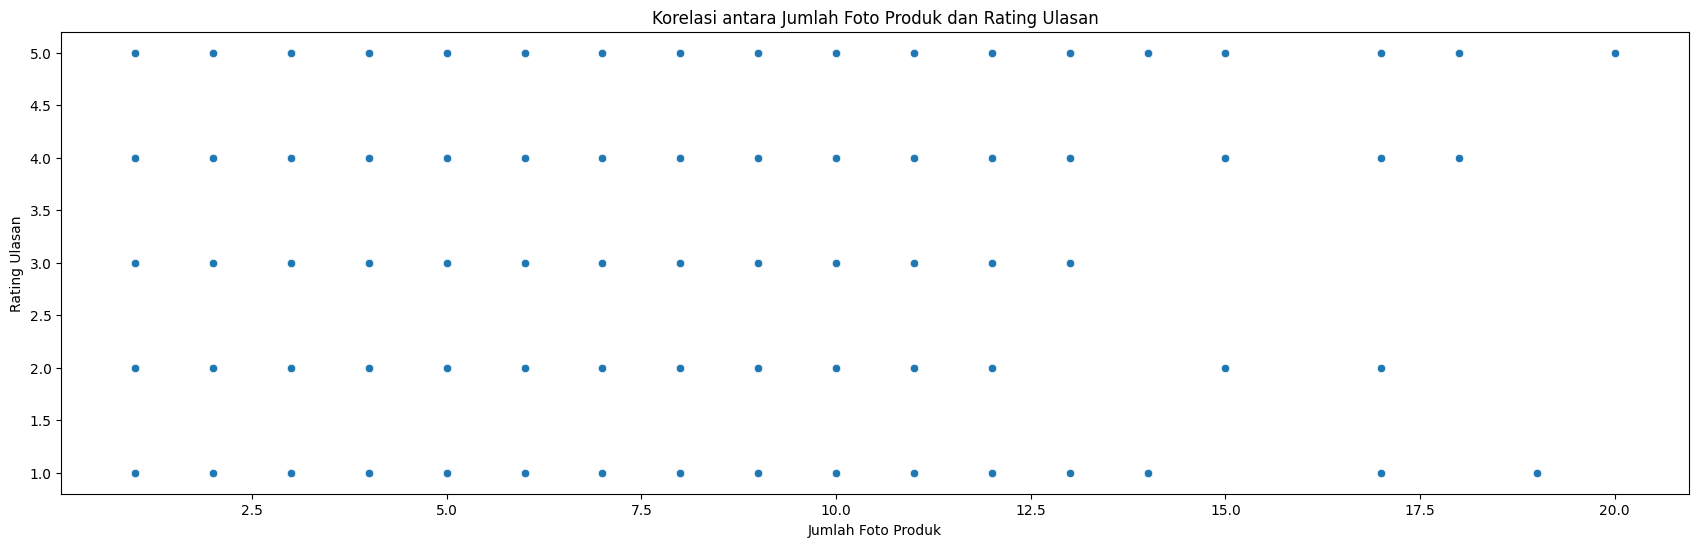

In [ ]:
plt.figure(figsize=(21, 6))

# Scatter plot
sns.scatterplot(x='product_photos_qty', y='review_score', data=data1_df)

# Menambahkan judul dan label
plt.title('Korelasi antara Jumlah Foto Produk dan Rating Ulasan')
plt.xlabel('Jumlah Foto Produk')
plt.ylabel('Rating Ulasan')

# Menampilkan plot
plt.show()

### Pertanyaan 2:

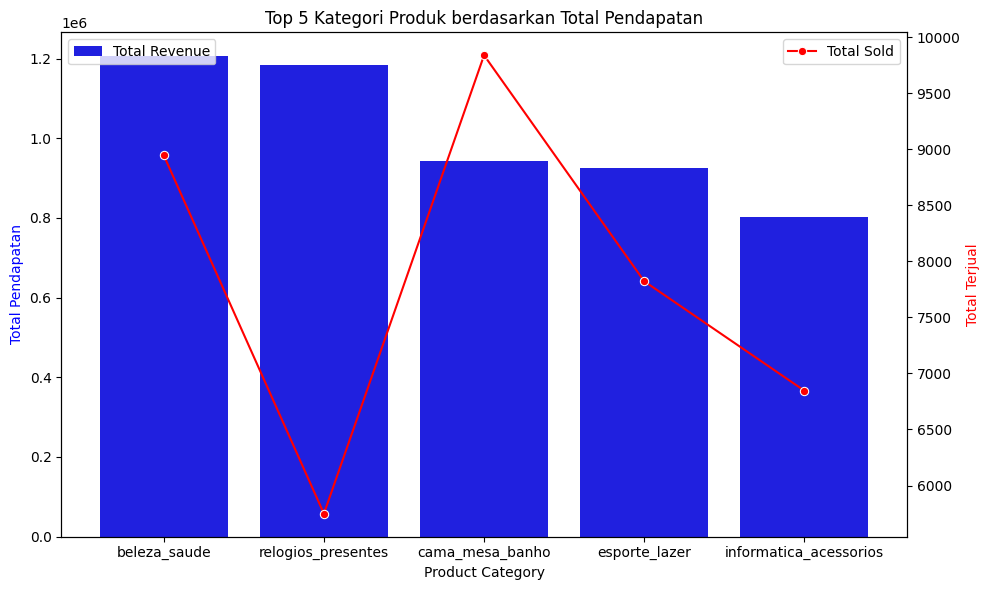

In [ ]:
# Menghitung total penjualan dan total pendapatan per kategori
category_sales = data2_df.groupby('product_category_name').agg(
    total_terjual=('order_id', 'count'),
    total_pendapatan=('price', 'sum')
).reset_index()

# Mengambil 5 kategori dengan pendapatan tertinggi
top5_categories = category_sales.nlargest(5, 'total_pendapatan')

# Membuat figure dan dua subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Membuat bar plot untuk total pendapatan pada 5 kategori dengan pendapatan tertinggi
sns.barplot(x='product_category_name', y='total_pendapatan', data=top5_categories, ax=ax1, color='b', label='Total Revenue')

# Menggunakan twinx untuk membuat sumbu kedua untuk total sold
ax2 = ax1.twinx()
sns.lineplot(x='product_category_name', y='total_terjual', data=top5_categories, ax=ax2, color='r', marker='o', label='Total Sold')

# Menambah label dan judul
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Total Pendapatan', color='b')
ax2.set_ylabel('Total Terjual', color='r')
plt.title('Top 5 Kategori Produk berdasarkan Total Pendapatan')

# Menambahkan legenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight:**

Pertanyaan 1: hubungan antara jumlah foto produk dan rating ulasan menunjukkan pola distribusi yang acak sehingga tidak ada tren yang jelas atau hubungan linear antara kedua variabel tersebut. Namun, rating ulasan 5 adalah yang paling dominan muncul secara konsisten dari berapa banyak foto produk yang diunggah.

Pertanyaan 2:
- Kategori "beleza_saude" menempati posisi pertama dalam total pendapatan dan memiliki angka penjualan yang tinggi. Ini menunjukkan bahwa kategori ini tidak hanya menghasilkan pendapatan tinggi tetapi juga memiliki volume penjualan yang signifikan.
- Kategori "relogios_presentes" memiliki total pendapatan yang hampir setara dengan "beleza_saude" namun jumlah produk yang terjual sangat rendah. Hal ini menunjukkan bahwa produk-produk dalam kategori ini mungkin memiliki harga yang jauh lebih tinggi dibandingkan kategori lainnya, sehingga mampu menghasilkan pendapatan besar meskipun dengan volume penjualan yang lebih rendah.
- Kategori "cama_mesa_banho" menempati posisi tertinggi dalam hal total penjualan tetapi total pendapatannya lebih rendah dibandingkan dua kategori sebelumnya. Ini menunjukkan bahwa meskipun kategori ini memiliki volume penjualan tinggi, harga produk per item kemungkinan lebih rendah.
- Kategori "esporte_lazer" dan "informatica_acessorios" memiliki pola yang mirip dengan kategori sebelumnya, di mana "esporte_lazer" memiliki volume penjualan yang cukup besar namun dengan total pendapatan yang tidak terlalu tinggi. Sedangkan "informatica_acessorios" memiliki jumlah produk terjual sekitar 7000 dengan total pendapatan yang lebih rendah dari kategori lainnya, menunjukkan produk dengan harga rata-rata lebih rendah.

## Conclusion

- Conclution pertanyaan 1: Terdapat korelasi positif antara jumlah foto produk dan rating ulasan tetapi tidak signifikan. Dimana semakin banyak jumlah foto produk maka rating ulasan semakin baik.
- Conclution pertanyaan 2: Produk kategori yang paling banyak terjual dan menghasilkan pendapatan tertinggi yaitu beleza_saude, relogios_presentes, cama_mesa_banho, esporte_lazer, dan informatica_acessorios. Meskipun kategori cama_mesa_banho memiliki jumlah produk terjual yang paling banyak, pendapatan yang dihasilkan relatif lebih rendah dibandingkan dua kategori pertama sehingga menunjukkan bahwa kategori dengan jumlah produk terjual lebih sedikit tidak selalu memiliki pendapatan yang lebih rendah.